<a href="https://colab.research.google.com/github/Riddhi-14/Assessments/blob/main/Assessement3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
60000
10000
Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5492 - accuracy: 0.8382 - val_loss: 0.3756 - val_accuracy: 0.8983
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3623 - accuracy: 0.8966 - val_loss: 0.3347 - val_accuracy: 0.9080
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3361 - accuracy: 0.9040 - val_loss: 0.3133 - val_accuracy: 0.9146
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3218 - accuracy: 0.9082 - val_loss: 0.3071 - val_accuracy: 0.9139
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3142 - accuracy: 0.9100 - val_loss: 0.2967 - val_accuracy: 0.9182
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3073 - accuracy: 0.9123 - val_loss: 0.2992 - val_accuracy: 0.9150
Epoch 7/10
1875/1875 [=========================

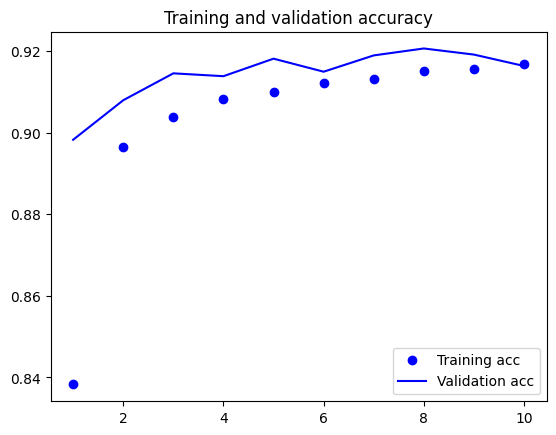

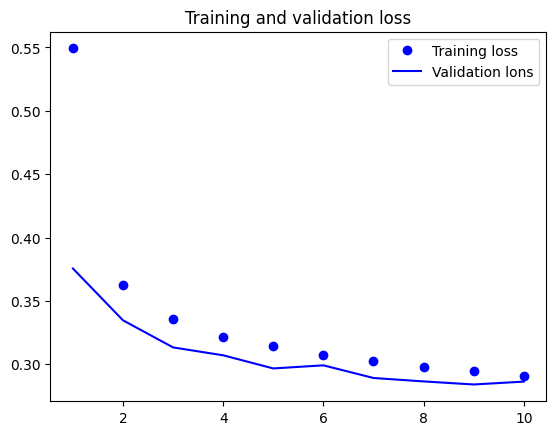

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from ann_visualizer.visualize import ann_via
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


from keras.callbacks import CSVLogger


csv_logger=CSVLogger("model_history_log.csv", append=True)


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#loding the images


#train_images mnist.train_images()


#train labels mnist.train labels()


print(len(train_labels))


#test_images mnist.test_images()


#test_labels mnist.test_labels()


print(len(test_labels))


#Normalize the images. Pixel values are between 0-255 in image learning it is


#good practice to normalize your data to a smaller range like between 0 and 1.


train_images= (train_images/255)-0.5


#print(train_images)


test_images =(test_images/ 255) - 0.5


#print(test_images)


#lets give the hyper parameters


num_filters = 1


filter_size = 9


pool_size = 2


# Model is being trained on 1875 batches of 32 im


# Build the model.


model = Sequential ([
    Conv2D(num_filters, filter_size, input_shape=(28,28,1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense (10, activation='softmax'),
])


# Compile the model.
model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],


)


tf.keras.callbacks.EarlyStopping(


    monitor="loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False, )


callback_1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)


#Train the model.


history=  model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=10,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[csv_logger, callback_1],


)


model.summary()


#Save the model:
model.save_weights('cnn.h5')


#Load the model's saved weights.
model.load_weights('cnn.h5')


# Predict on the first 10 test images.


predictions= model.predict(test_images[:10])


# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]


# Check our predictions against the ground truths.


print(test_labels[:10]) # [7, 2, 1, 0, 41


#Callback records events into a History object.


accuracy = history.history['accuracy']


val_accuracy=history.history['val_accuracy']


loss= history.history['loss']


val_loss = history.history['val_loss']


#The range of epochs, from 1 to the total number of epochs, is often used to plot the learning curves of the model.


#the range function is used to generate list of integers from 1 to the length of the accuracy list plus one. This is because the accuracy list is typically recorded at the and out each spoch, starting from the first epoch.


epochs = range(1, len (accuracy) +1)


plt.plot(epochs, accuracy, 'bo', label= 'Training acc')


plt.plot(epochs, val_accuracy, 'b', label= 'Validation acc')


plt.title('Training and validation accuracy')


plt.legend()


plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation lons')


plt.title('Training and validation loss')


plt.legend()


plt.show()
